In [1]:
import pandas as pd
from collections import Counter

In [2]:
df = pd.read_csv('train.tsv', sep='\t')

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12239 entries, 0 to 12238
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   @USER She should ask a few native Americans what their take on this is.  12239 non-null  object
 1   OFF                                                                      12239 non-null  object
dtypes: object(2)
memory usage: 191.4+ KB
None


,@USER She should ask a few native Americans what their take on this is.,OFF
0,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
1,Amazon is investigating Chinese employees who ...,NOT
2,"@USER Someone should'veTaken"" this piece of sh...",OFF
3,@USER @USER Obama wanted liberals &amp; illega...,NOT
4,@USER Liberals are all Kookoo !!!,OFF


In [3]:
# Add column names (tweet, label)
df.columns = ['tweet', 'label']
df.head()

,tweet,label
0,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
1,Amazon is investigating Chinese employees who ...,NOT
2,"@USER Someone should'veTaken"" this piece of sh...",OFF
3,@USER @USER Obama wanted liberals &amp; illega...,NOT
4,@USER Liberals are all Kookoo !!!,OFF


In [4]:
# Show label distribution using pandas

label_counts = df['label'].value_counts()
print("Label distribution:")
label_counts

Label distribution:


label
NOT    8192
OFF    4047
Name: count, dtype: int64

In [5]:
# Count the most common words for label OFF

off_tweets = df[df['label'] == 'OFF']['tweet'].tolist()
all_off_words = ' '.join(off_tweets).split()
off_word_counts = Counter(all_off_words)
most_common_off = off_word_counts.most_common(10)
print("Most common words in OFF tweets:", most_common_off)

# Count the most common words for label NOT

not_tweets = df[df['label'] == 'NOT']['tweet'].tolist()
all_not_words = ' '.join(not_tweets).split()
not_word_counts = Counter(all_not_words)
most_common_not = not_word_counts.most_common(10)
print("Most common words in NOT tweets:", most_common_not)

Most common words in OFF tweets: [('@USER', 8226), ('the', 2634), ('to', 2039), ('is', 2027), ('a', 1938), ('and', 1537), ('of', 1223), ('you', 1130), ('are', 1116), ('that', 816)]
Most common words in NOT tweets: [('@USER', 22540), ('the', 4742), ('to', 3646), ('is', 3541), ('a', 2787), ('and', 2666), ('you', 2221), ('of', 2210), ('are', 1973), ('I', 1774)]


In [6]:
# Get stopwords from nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /home/twanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
words_to_remove = stop_words | set(["@USER", "URL"])

In [8]:
# Ingore words_to_remove from words and then recount most common words
def filter_words(word_counts, words_to_remove):
    for word in words_to_remove:
        if word in word_counts:
            del word_counts[word]
    return word_counts
filtered_off_word_counts = filter_words(off_word_counts, words_to_remove)
most_common_off_filtered = filtered_off_word_counts.most_common(10)
print("Most common words in OFF tweets (filtered):", most_common_off_filtered)

Most common words in OFF tweets (filtered): [('I', 814), ('like', 403), ('gun', 390), ('You', 356), ('He', 351), ('control', 283), ('The', 283), ('people', 269), ('She', 266), ('&amp;', 248)]


In [9]:
# Ignore words_to_remove from words and then recount most common words for NOT
filtered_not_word_counts = filter_words(not_word_counts, words_to_remove)
most_common_not_filtered = filtered_not_word_counts.most_common(10)
print("Most common words in NOT tweets (filtered):", most_common_not_filtered)


Most common words in NOT tweets (filtered): [('I', 1774), ('You', 690), ('gun', 647), ('He', 567), ('like', 527), ('She', 504), ('The', 480), ('control', 459), ('#MAGA', 424), ('liberals', 402)]


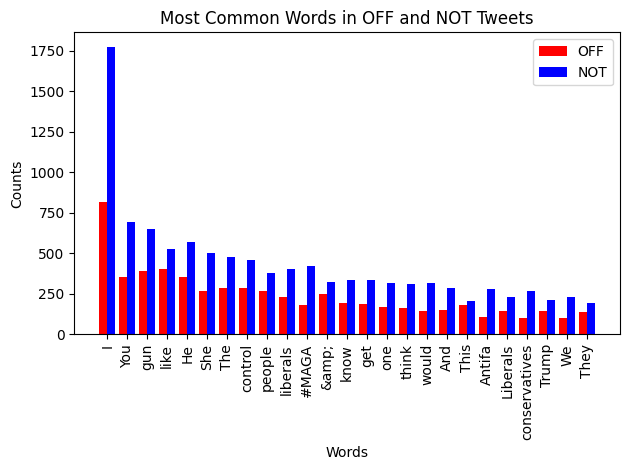

In [10]:
# Create a barchart showing the most common 25 words for both labels (in one chart) for 
# each word also show the count for both labels (use different colors)
# if a word is not present in one label, get the count from off_words_count or not_word_counts
import matplotlib.pyplot as plt

def plot_common_words(off_word_counts, not_word_counts, num_words=25):
    all_words = set(off_word_counts.keys()).union(set(not_word_counts.keys()))
    common_words = sorted(all_words, key=lambda w: off_word_counts[w] + not_word_counts[w], reverse=True)[:num_words]

    off_counts = [off_word_counts.get(word, 0) for word in common_words]
    not_counts = [not_word_counts.get(word, 0) for word in common_words]

    x = range(len(common_words))
    plt.bar(x, off_counts, width=0.4, label='OFF', color='r', align='center')
    plt.bar([i + 0.4 for i in x], not_counts, width=0.4, label='NOT', color='b', align='center')

    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title('Most Common Words in OFF and NOT Tweets')
    plt.xticks([i + 0.2 for i in x], common_words, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_common_words(off_word_counts, not_word_counts, num_words=25)


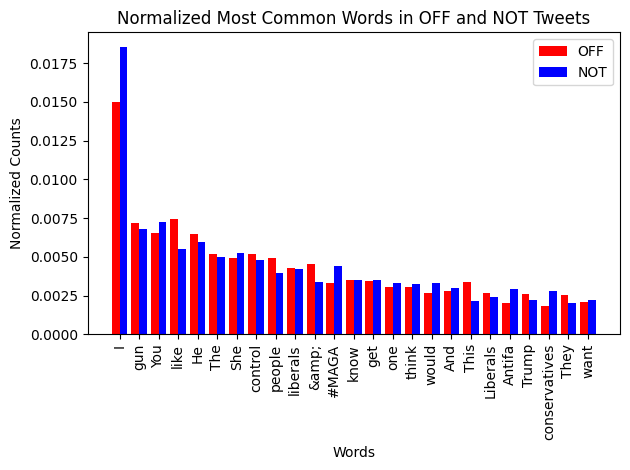

In [11]:
# Now we correct for the label imbalance by normalizing the counts by the total number of tweets in each label 
# using a new function plot_normalized_common_words
def plot_normalized_common_words(off_word_counts, not_word_counts, num_words=25):
    total_off = sum(off_word_counts.values())
    total_not = sum(not_word_counts.values())

    all_words = set(off_word_counts.keys()).union(set(not_word_counts.keys()))
    common_words = sorted(all_words, key=lambda w: (off_word_counts[w] / total_off) + (not_word_counts[w] / total_not), reverse=True)[:num_words]

    off_counts = [off_word_counts.get(word, 0) / total_off for word in common_words]
    not_counts = [not_word_counts.get(word, 0) / total_not for word in common_words]

    x = range(len(common_words))
    plt.bar(x, off_counts, width=0.4, label='OFF', color='r', align='center')
    plt.bar([i + 0.4 for i in x], not_counts, width=0.4, label='NOT', color='b', align='center')

    plt.xlabel('Words')
    plt.ylabel('Normalized Counts')
    plt.title('Normalized Most Common Words in OFF and NOT Tweets')
    plt.xticks([i + 0.2 for i in x], common_words, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_normalized_common_words(off_word_counts, not_word_counts, num_words=25)


In [12]:
# DO the same for ngrams (bigrams and trigrams)
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(texts, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(texts)
    return vectorizer.get_feature_names_out(), X.toarray()
off_texts = df[df['label'] == 'OFF']['tweet'].tolist()
not_texts = df[df['label'] == 'NOT']['tweet'].tolist()

bigram_features_off, bigram_counts_off = get_ngrams(off_texts, 2)
bigram_features_not, bigram_counts_not = get_ngrams(not_texts, 2)
bigram_totals_off = bigram_counts_off.sum(axis=0)
bigram_totals_not = bigram_counts_not.sum(axis=0)
bigram_word_counts_off = Counter(dict(zip(bigram_features_off, bigram_totals_off)))
bigram_word_counts_not = Counter(dict(zip(bigram_features_not, bigram_totals_not)))
most_common_bigrams_off = bigram_word_counts_off.most_common(10)
most_common_bigrams_not = bigram_word_counts_not.most_common(10)
print("Most common bigrams in OFF tweets:", most_common_bigrams_off)
print("Most common bigrams in NOT tweets:", most_common_bigrams_not)

Most common bigrams in OFF tweets: [('user user', np.int64(4249)), ('he is', np.int64(501)), ('you are', np.int64(403)), ('she is', np.int64(393)), ('gun control', np.int64(391)), ('in the', np.int64(206)), ('user you', np.int64(200)), ('of the', np.int64(189)), ('user he', np.int64(182)), ('this is', np.int64(145))]
Most common bigrams in NOT tweets: [('user user', np.int64(14516)), ('you are', np.int64(1107)), ('he is', np.int64(976)), ('she is', np.int64(970)), ('gun control', np.int64(677)), ('user you', np.int64(448)), ('of the', np.int64(423)), ('user he', np.int64(376)), ('in the', np.int64(317)), ('user she', np.int64(279))]
